In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score


from sklearn.model_selection import GridSearchCV

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_data_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

## check dulu nilai 0 pada features data, selain fitur target
print(diabetes_data_copy.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


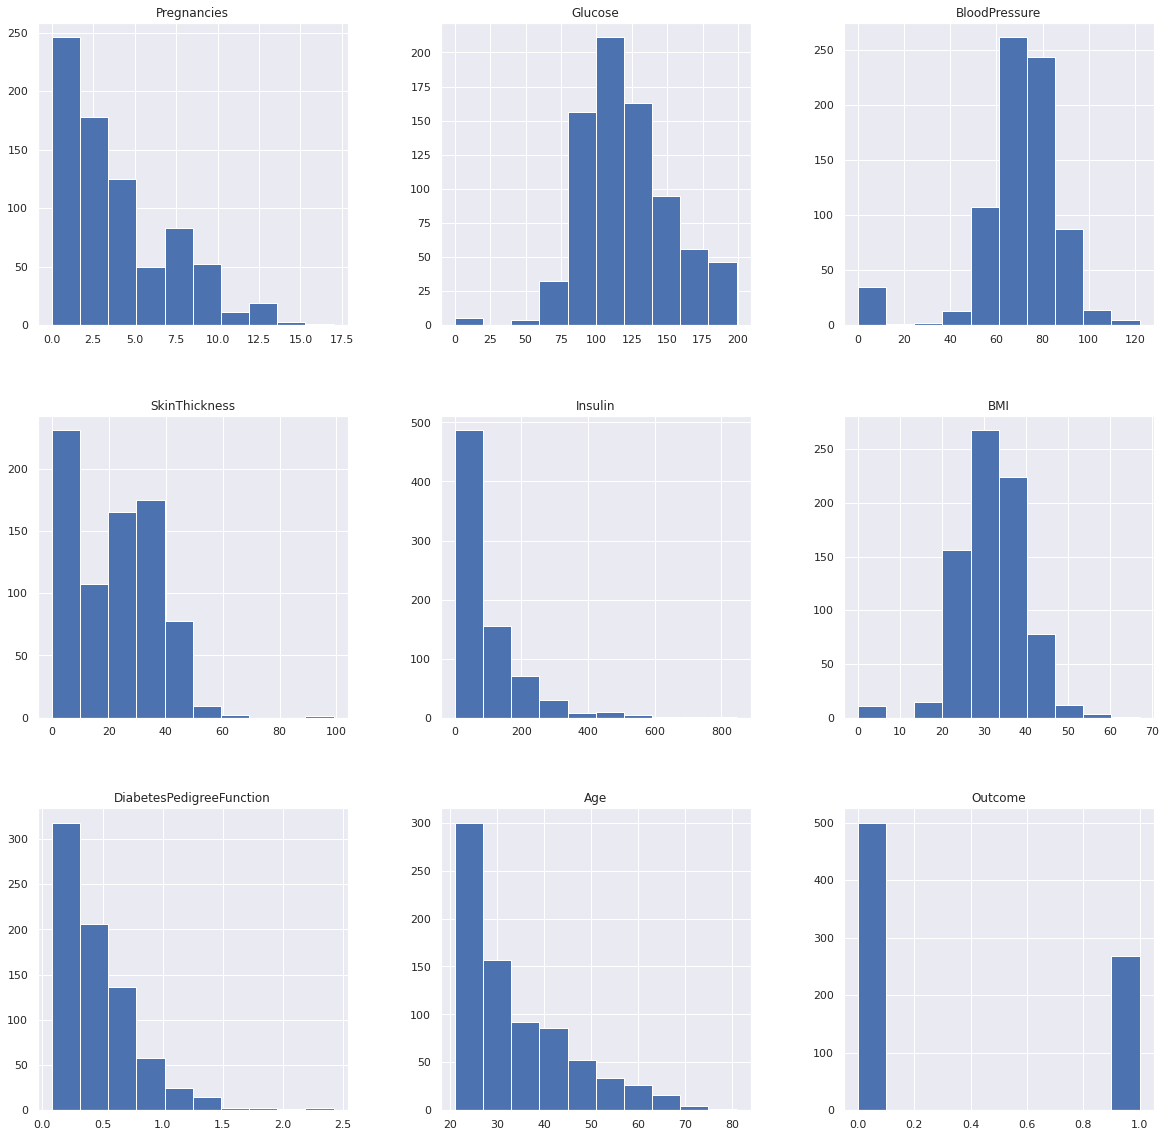

In [6]:
p = diabetes_data.hist(figsize = (20,20))

In [7]:
# diabetes_data_copy['Pregnancies'].fillna(diabetes_data_copy['Pregnancies'].mean(), inplace = True)
# diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
# diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
# diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].mean(), inplace = True)
# diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].mean(), inplace = True)
# diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)

diabetes_data_copy['Pregnancies'].fillna(method ='bfill', inplace = True)
diabetes_data_copy['Glucose'].fillna(method ='bfill', inplace = True)
diabetes_data_copy['BloodPressure'].fillna(method ='bfill', inplace = True)
diabetes_data_copy['SkinThickness'].fillna(method ='bfill', inplace = True)
diabetes_data_copy['Insulin'].fillna(method ='pad', inplace = True)
diabetes_data_copy['BMI'].fillna(method ='bfill', inplace = True)
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,23.0,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

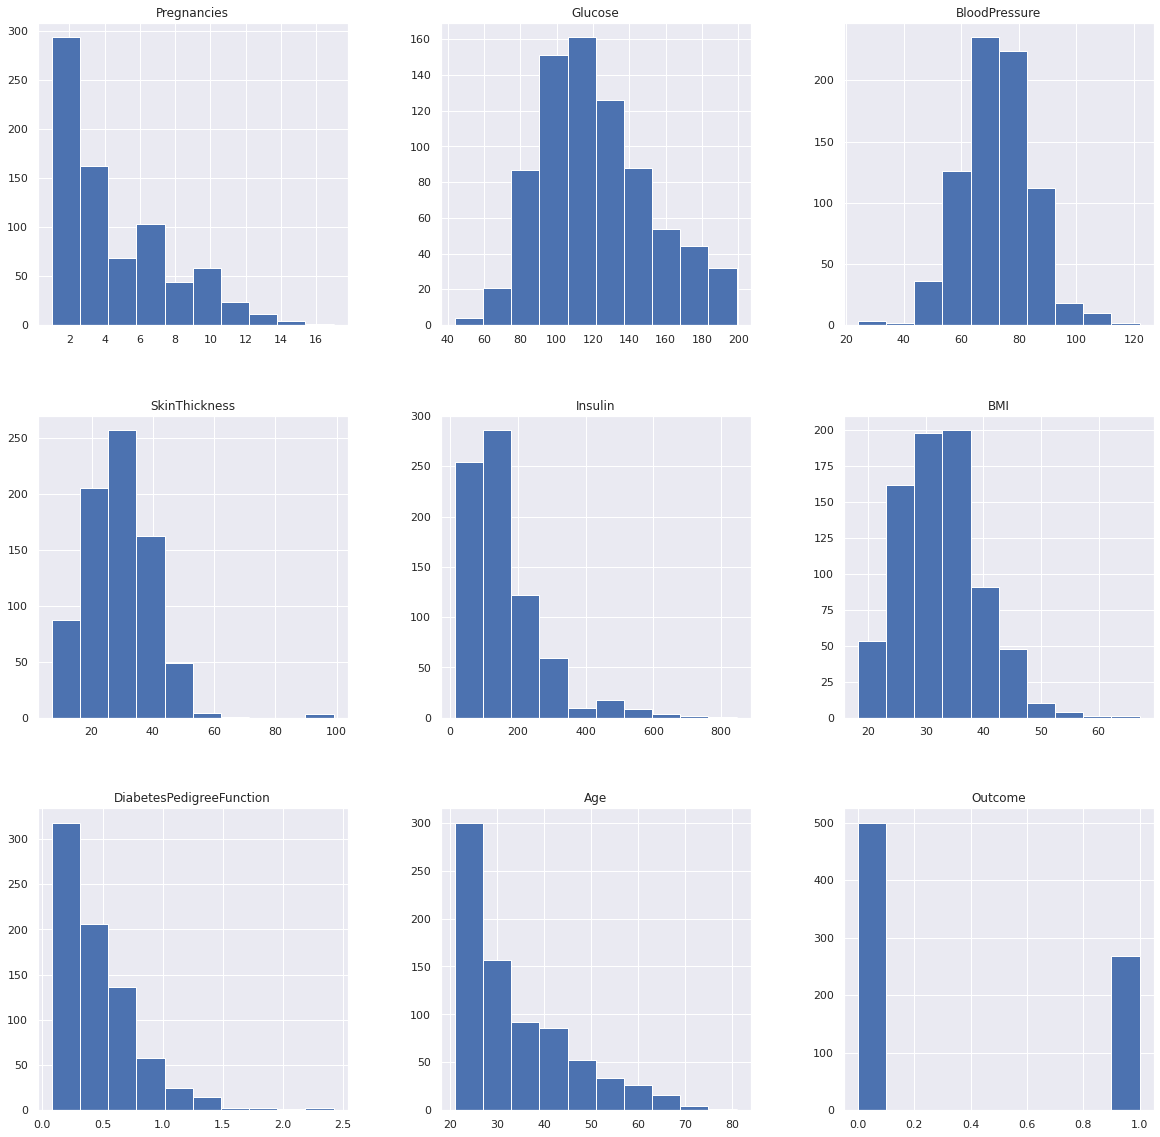

In [9]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [10]:
import seaborn as sns
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64


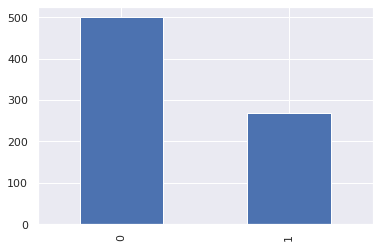

In [11]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data_copy["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data_copy.Outcome.value_counts())
p=diabetes_data_copy.Outcome.value_counts().plot(kind="bar")

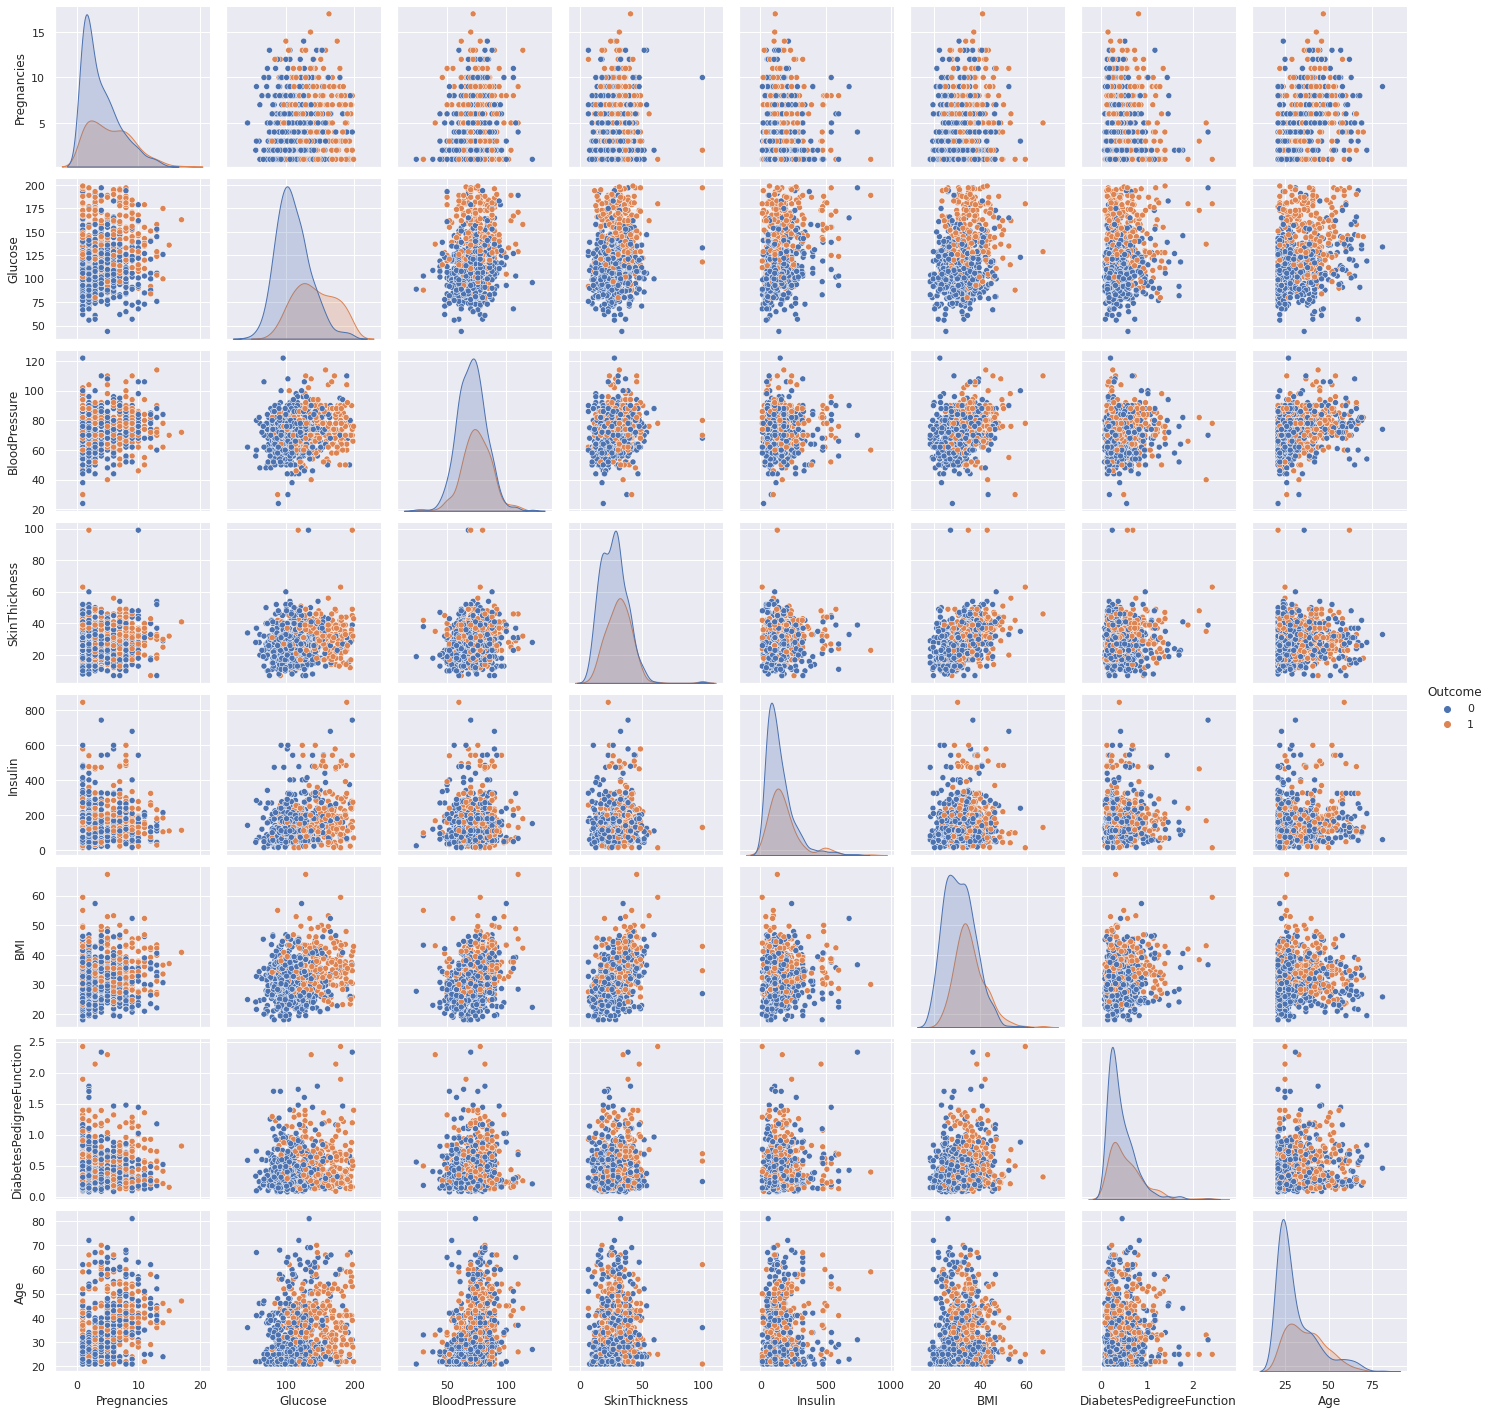

In [12]:
#Data Sudah Clean
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

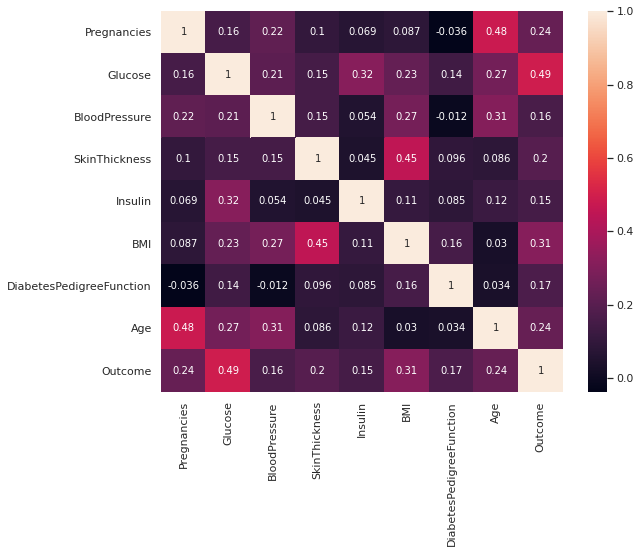

In [13]:
#data clean heatmap
plt.figure(figsize=(9,7))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True)

In [14]:
# check korelasi atribut SalePrice dengan semua variabel lain
diabetes_data_copy.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.490363
BMI                         0.314538
Age                         0.238356
Pregnancies                 0.236426
SkinThickness               0.195603
DiabetesPedigreeFunction    0.173844
BloodPressure               0.164303
Insulin                     0.151672
Name: Outcome, dtype: float64

In [15]:
data_update = diabetes_data_copy.drop(["BloodPressure","Insulin","DiabetesPedigreeFunction"], axis = 1)

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_update.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'])
# X =  pd.DataFrame(data_update.drop(["Outcome"],axis = 1), columns=['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'])
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.496156,0.867596,0.558197,0.166964,1.425995
1,-1.061684,-1.192763,0.008940,-0.848188,-0.190672
2,1.119292,2.012239,-0.540318,-1.326759,-0.105584
3,-1.061684,-1.061947,-0.540318,-0.630655,-1.041549
4,0.184588,0.507850,0.558197,1.544669,-0.020496


In [17]:
y = data_update.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [18]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0, stratify=y)

In [20]:
X_test.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
608,-1.061684,0.998412,0.924369,1.312635,-0.531023
626,0.184588,0.115401,-0.631860,-1.123729,-1.041549
678,-0.438548,-0.015415,-1.089575,0.515016,-0.701198
186,1.119292,1.946831,0.649740,-0.340612,2.276873
520,-0.750116,-1.748733,0.283568,-1.080222,-0.701198


In [21]:
y_test.head(20)

608    0
626    0
678    1
186    1
520    0
81     0
592    1
507    0
680    0
94     0
333    0
765    0
595    1
431    0
319    1
295    0
525    0
633    0
339    1
54     0
Name: Outcome, dtype: int64

In [22]:
#Hasil Prediksi train Data
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric = 'euclidean')
classifier.fit(X_train, y_train)

y_predtrain = classifier.predict(X_train)
print(y_predtrain)

[1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 

In [23]:
#Hasil akuasi train data
accuracy= accuracy_score(y_train, y_predtrain)
accuracy

0.813780260707635

In [24]:
#Confusion Matrix train Data
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_train, y_predtrain))
print(classification_report(y_train, y_predtrain))

pd.crosstab(y_train, y_predtrain, rownames=['Actual'], colnames = ['Predicted'], margins=True)

[[301  49]
 [ 51 136]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       350
           1       0.74      0.73      0.73       187

    accuracy                           0.81       537
   macro avg       0.80      0.79      0.79       537
weighted avg       0.81      0.81      0.81       537



Predicted,0,1,All
Actual,,,
0,301,49,350
1,51,136,187
All,352,185,537


In [25]:
!pip install pycm
from pycm import *

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 571 kB 9.3 MB/s 


In [26]:
ytrain = np.array(y_train)

In [27]:
#perhitungan confusion matrix train
print(ConfusionMatrix(ytrain, y_predtrain))

Predict   0         1         
Actual
0         301       49        

1         51        136       





Overall Statistics : 

95% CI                                                            (0.78085,0.84671)
ACC Macro                                                         0.81378
ARI                                                               0.38744
AUNP                                                              0.79364
AUNU                                                              0.79364
Bangdiwala B                                                      0.69138
Bennett S                                                         0.62756
CBA                                                               0.79119
CSI                                                               0.58876
Chi-Squared                                                       186.14407
Chi-Squared DF                                                    1
Conditional Entropy                                

In [28]:
y_predtest = classifier.predict(X_test)
print(y_predtest)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [29]:
#Confussion Matriks
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_predtest))
print(classification_report(y_test, y_predtest))

pd.crosstab(y_test, y_predtest, rownames=['Actual'], colnames = ['Predicted'], margins=True)

[[131  19]
 [ 27  54]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       150
           1       0.74      0.67      0.70        81

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231



Predicted,0,1,All
Actual,,,
0,131,19,150
1,27,54,81
All,158,73,231


In [30]:
accuracy= accuracy_score(y_test, y_predtest)
accuracy

0.8008658008658008

Text(0, 0.5, 'Mean Error')

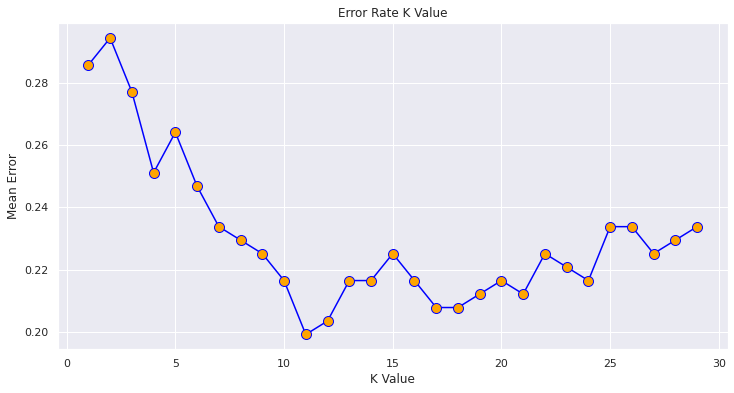

In [31]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30): 
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='blue', linestyle='-', marker='o',  
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [34]:
#PICKLE

import pickle

with open('model_up16','wb') as r:
  pickle.dump(classifier,r)

In [35]:
with open('model_up16','rb') as r:
  knnp = pickle.load(r)

In [36]:
import pickle
scalerfile = 'scaler16.sav'
pickle.dump(sc_X, open(scalerfile, 'wb'))

In [37]:
import pickle
scalerfile = 'scaler16.sav'
scaler = pickle.load(open(scalerfile, 'rb'))
X_new = np.array([[ 451, 64, 55, 78, 21 ],[6,85,33.6,0.1,31]])
test_scaled_set = sc_X.transform(X_new)
prediction1 = knnp.predict(test_scaled_set)
prediction1

array([1, 0])

In [38]:
y_predt = knnp.predict(X_test)

round(accuracy_score(y_test,y_predtest),11)

0.80086580087

In [39]:
X_test.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
608,-1.061684,0.998412,0.924369,1.312635,-0.531023
626,0.184588,0.115401,-0.631860,-1.123729,-1.041549
678,-0.438548,-0.015415,-1.089575,0.515016,-0.701198
186,1.119292,1.946831,0.649740,-0.340612,2.276873
520,-0.750116,-1.748733,0.283568,-1.080222,-0.701198


In [40]:
y_test.head(30)

608    0
626    0
678    1
186    1
520    0
81     0
592    1
507    0
680    0
94     0
333    0
765    0
595    1
431    0
319    1
295    0
525    0
633    0
339    1
54     0
134    0
195    1
360    1
205    0
247    0
495    0
432    0
433    0
506    1
230    1
Name: Outcome, dtype: int64

In [41]:
#HyperTUning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10,11],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_train)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_train))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_train))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 11, 'weights': 'distance'}
Accuracy: 1.0
Confusion Metrix:
 [[350   0]
 [  0 187]]


In [42]:
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8008658008658008
Confusion Metrix:
 [[130  26]
 [ 20  55]]


In [43]:
X_new = np.array([[ 45, 64, 55, 78, 21 ],[6,85,33.6,0.1,31]])
test_scaled_set1 = sc_X.transform(X_new)
test_scaled_set1


array([[12.64731068, -1.87954911,  2.38905489,  6.60592487, -1.04154944],
       [ 0.49615593, -1.19276294,  0.43003703, -4.69126146, -0.19067191]])

In [44]:
prediction11 = classifier.predict(test_scaled_set1)
prediction11

array([1, 0])

In [45]:
X_new1 = np.array([[ 4, 99, 17, 25.6, 28 ]])
test_scaled_set = sc_X.transform(X_new1)
test_scaled_set

array([[-0.12698022, -0.73490549, -1.08957495, -0.99320945, -0.44593516]])

In [46]:
prediction1 = classifier.predict(test_scaled_set)
prediction1

array([0])